# 1. Clusterização Hierárquica

In [1]:
# import libraries

# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# library of math
import math
# data visualization
from matplotlib import pyplot as plt 
# datasets
from sklearn import datasets

In [2]:
# Scikit Learning hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
# SciPy hierarchical clustering
from scipy.cluster import hierarchy

## 1.1 Clusterização Hierárquica

Verifique abaixo o resultado da clusterização hierárquica variando a quantidade de clusters de forma iterativa. Teste também outras funções de ligação (linkage).

Fique livre parar alterar ou criar novos dados no dataset de exemplo abaixo.

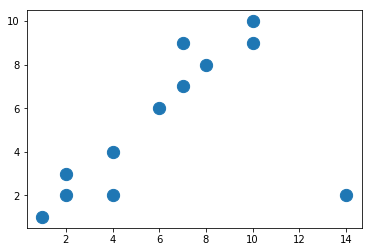

In [3]:
# Dataset
tmp_data = np.array([[1,1],[2,2],[2,3],[4,4],
                     [4,2],[6,6],[10,9],[7,7],
                     [8,8],[7,9],[10,10],[14,2]])

plt.scatter(tmp_data[:,0], tmp_data[:,1], s=150)
plt.show()

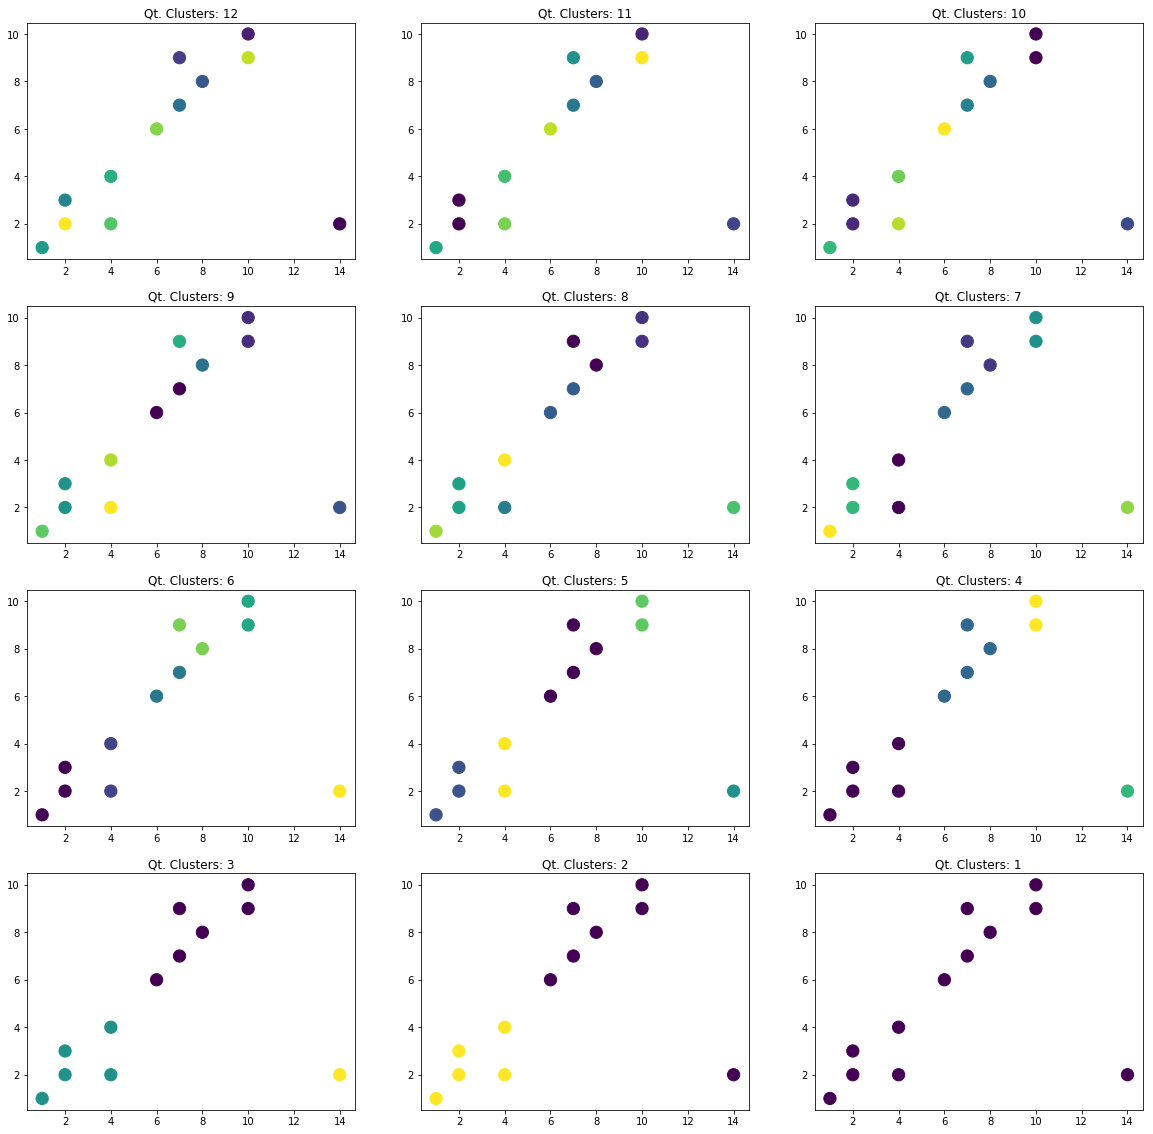

In [4]:
# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
ag_model = AgglomerativeClustering(linkage=linkage)

# Número de colunas do plot
plot_col = 3

n_rows, n_col = tmp_data.shape
fig, ax = plt.subplots(nrows=math.ceil(len(tmp_data)/plot_col), 
                       ncols=plot_col,figsize=(20,20))

count = 0
for n_clusters in range(len(tmp_data),0,-1):
    index = abs(n_clusters - len(tmp_data))
    
    # Atribui o número de clusters
    ag_model.n_clusters = n_clusters
    # Ajusta o modelo
    ag_model = ag_model.fit(tmp_data)
    
    if plot_col == 1:
        ax[count].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count].set_title("Qt. Clusters: " + str(n_clusters))
    else:
        ax[count, (index)%plot_col].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count, (index)%plot_col].set_title("Qt. Clusters: " + str(n_clusters))
    
    if (index+1) % plot_col == 0:
        count += 1     
        
plt.show()

# 1.2 Dendrograma

Um dendrograma é um tipo de diagrama de árvore que mostra o relacionamentos entre conjuntos de dados semelhantes, ou agrupamento hierárquico. Eles são freqüentemente usados em biologia para mostrar o agrupamento entre genes ou amostras, mas podem representar qualquer tipo de dados agrupados.
> https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/

Utilize o código abaixo para criar os Dendrogramas dos dados utilizados nas células acima. Fique livre para retornar e testar outras distribuições dos dados e funções de ligamento (linkage).

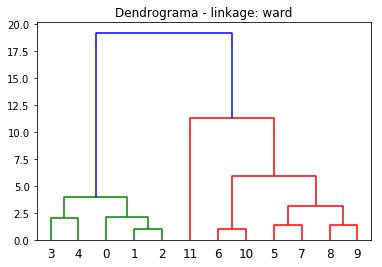

In [5]:
# Usa o método de linkage especificado 
# para construir o dendrograma
if (linkage == 'average'):
    Z = hierarchy.average(tmp_data)
elif (linkage == 'complete'):
    Z = hierarchy.complete(tmp_data)
elif (linkage == 'ward'):
    Z = hierarchy.ward(tmp_data)

plt.figure()
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

É possível fazer um teste de permutação para validar o número de clusters escolhidos, ou seja, verificar se realmente existe uma tendência não aleatória para os objetos se agruparem.

A técnica envolve testes estatísticos e pode ser estudado pelo material a seguir:
http://www.econ.upf.edu/~michael/stanford/maeb7.pdf

## 1.3 Exemplo 1 - Bolhas com diferentes variâncias

Observe a distribuição do dataset abaixo.

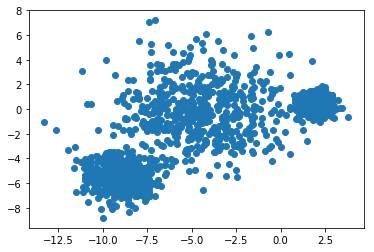

In [6]:
# blobs with varied variances
n_samples = 1500
random_state = 170
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
dataset_varied = varied[0]

plt.scatter(dataset_varied[:,0], dataset_varied[:,1])
plt.show()

Utilize o algoritmo do K-means para separa os conjuntos.

Você pode importar o K-means criado por você! Para importar uma função de um notebook para outro instale a biblioteca nbimporter:
 - pip install nbimporter

In [7]:
import nbimporter
from K_means_Igor import KMeans

Importing Jupyter notebook from K_means_Igor.ipynb


Inércia =  5747.9873663462795


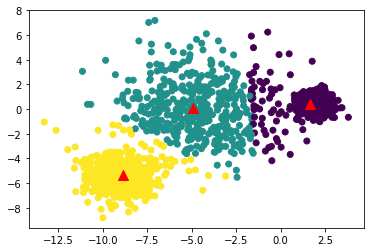

In [8]:
### CODE HERE ###
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset_varied)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset_varied[:,0], dataset_varied[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

Os dados parecem estar agrupados corretamente? Tente fazer o mesmo procedimento com algoritmo de clusterização hieráquica 
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

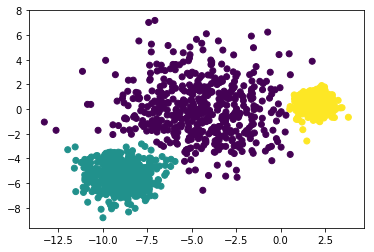

'\n\n# Teste diferentes funções de ligações\n# {“ward”, “complete”, “average”}\nlinkage = \'ward\'\n\n# Clusterização hierárquica\nag_model = AgglomerativeClustering(linkage=linkage)\n\n# Número de colunas do plot\nplot_col = 3\n\nn_rows, n_col = dataset_varied.shape\nfig, ax = plt.subplots(nrows=math.ceil(len(dataset_varied)/plot_col), \n                       ncols=plot_col,figsize=(20,20))\n\ncount = 0\nfor n_clusters in range(len(dataset_varied),0,-1):\n    index = abs(n_clusters - len(dataset_varied))\n    \n    # Atribui o número de clusters\n    ag_model.n_clusters = n_clusters\n    # Ajusta o modelo\n    ag_model = ag_model.fit(dataset_varied)\n    \n    if plot_col == 1:\n        ax[count].scatter(dataset_varied[:,0], dataset_varied[:,1], c=ag_model.labels_, s=150)\n        ax[count].set_title("Qt. Clusters: " + str(n_clusters))\n    else:\n        ax[count, (index)%plot_col].scatter(dataset_varied[:,0], dataset_varied[:,1], c=ag_model.labels_, s=150)\n        ax[count, (index

In [9]:
### CODE HERE ###

from sklearn.cluster import AgglomerativeClustering as AggC

AggC = AggC(n_clusters=3, affinity="euclidean", memory=None, connectivity=None, compute_full_tree="auto", linkage="ward", pooling_func="deprecated")
AggC.fit(dataset_varied)

plt.scatter(dataset_varied[:,0], dataset_varied[:,1], c=AggC.labels_)

plt.show()
"""

# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
ag_model = AgglomerativeClustering(linkage=linkage)

# Número de colunas do plot
plot_col = 3

n_rows, n_col = dataset_varied.shape
fig, ax = plt.subplots(nrows=math.ceil(len(dataset_varied)/plot_col), 
                       ncols=plot_col,figsize=(20,20))

count = 0
for n_clusters in range(len(dataset_varied),0,-1):
    index = abs(n_clusters - len(dataset_varied))
    
    # Atribui o número de clusters
    ag_model.n_clusters = n_clusters
    # Ajusta o modelo
    ag_model = ag_model.fit(dataset_varied)
    
    if plot_col == 1:
        ax[count].scatter(dataset_varied[:,0], dataset_varied[:,1], c=ag_model.labels_, s=150)
        ax[count].set_title("Qt. Clusters: " + str(n_clusters))
    else:
        ax[count, (index)%plot_col].scatter(dataset_varied[:,0], dataset_varied[:,1], c=ag_model.labels_, s=150)
        ax[count, (index)%plot_col].set_title("Qt. Clusters: " + str(n_clusters))
    
    if (index+1) % plot_col == 0:
        count += 1     
        
plt.show()
"""

Mostre e análise o dendrograma do exemplo acima.

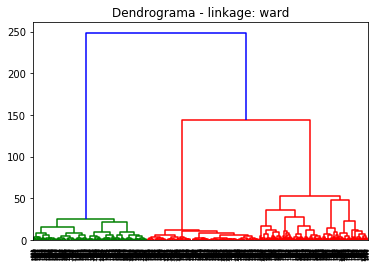

In [10]:
### CODE HERE ###
Z = hierarchy.ward(dataset_varied)

plt.figure()
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

Qual a sua conclusão?

"Escreva aqui" 
Ambos algoritmos, k-means e hierarquico foram bem sucedidos no agrupamento mas o hierarquico mostrou resultados ligeiramente melhores

## 1.4 Exemplo 2 - Noisy Circles

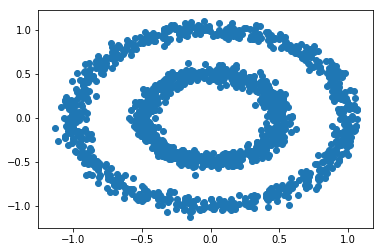

In [11]:
# Gerar o conjunto de dados
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
dataset_circles = noisy_circles[0]

# Mostrar os dados
plt.scatter(dataset_circles[:,0], dataset_circles[:,1])
plt.show()

Utilize o algoritmo do K-means para separa os conjuntos.

Inércia =  598.6445839229507


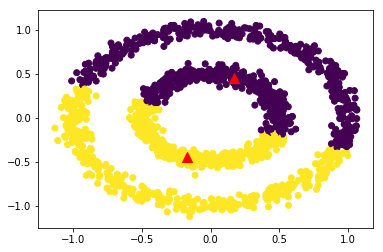

In [12]:
### CODE HERE ###
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset_circles)

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset_circles[:,0], dataset_circles[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

Os dados parecem estar agrupados corretamente? Tente fazer o mesmo procedimento com algoritmo de clusterização hieráquica, altera os parâmetros se for necessário.

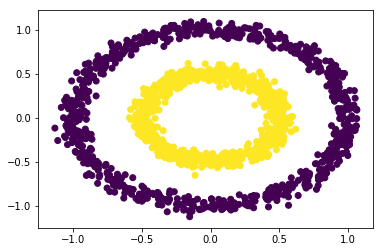

In [13]:
### CODE HERE ###

from sklearn.cluster import AgglomerativeClustering as AggC
AggC = AggC(n_clusters=2, affinity="euclidean", memory=None, connectivity=None, compute_full_tree="auto", linkage="single", pooling_func="deprecated")
AggC.fit(dataset_circles)

plt.scatter(dataset_circles[:,0], dataset_circles[:,1], c=AggC.labels_)

plt.show()

Mostre e análise o dendrograma do exemplo acima.

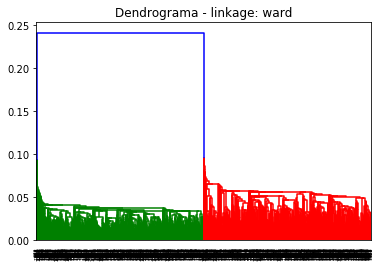

In [14]:
### CODE HERE ###
Z = hierarchy.single(dataset_circles)

plt.figure()
plt.title("Dendrograma - linkage: " + str(linkage))
dn = hierarchy.dendrogram(Z)

Qual a sua conclusão?

"Escreva aqui"
K-means não consegue separar este tipo de distribuição mas a clusterização hierarquica consegue desde que o numero de clusters escolhido seja preciso

# 2. DBSCAN

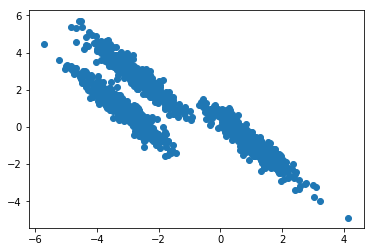

In [15]:
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
dataset = np.dot(X, transformation)

# Mostrar os dados
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

Clusterize os dados usando clusterização Hierárquica 

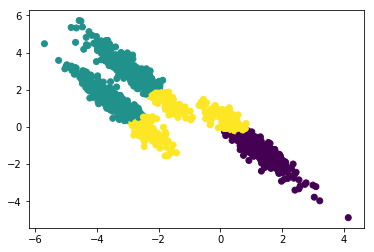

In [16]:
### CODE HERE ###

from sklearn.cluster import AgglomerativeClustering as AggC
AggC = AggC(n_clusters=3, affinity="euclidean", memory=None, connectivity=None, compute_full_tree="auto", linkage="complete", pooling_func="deprecated")
AggC.fit(dataset)

plt.scatter(dataset[:,0], dataset[:,1], c=AggC.labels_)

plt.show()

Clusterize os dados usando o algoritmo DBSCAN.
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

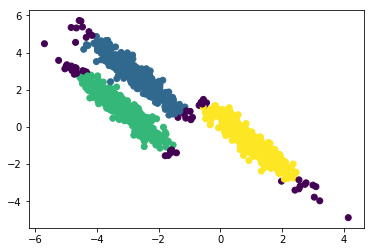

In [17]:
### CODE HERE ###
from sklearn.cluster import DBSCAN as DB
DB = DB(eps=0.5, min_samples=40, metric="euclidean", metric_params=None, algorithm="auto", leaf_size=30, p=None, n_jobs=None)
DB.fit(dataset)

plt.scatter(dataset[:,0], dataset[:,1], c=DB.labels_)

plt.show()

Qual a sua conclusão?

"Escreva aqui" Já neste tipo de distribuição de dados apenas o DBSCAN foi capaz de realizar um bom agrupamento